In [1]:
import warnings
warnings.simplefilter('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')

https://stackoverflow.com/questions/35595766/matplotlib-line-magic-causes-syntaxerror-in-python-script

Line magics are only supported by the IPython command line. They cannot simply be used inside a script, because %something is not correct Python syntax.

行魔术仅由 IPython 命令行支持。 它们不能简单地在脚本中使用，因为% something 不是正确的 Python 语法。

If you want to do this from a script you have to get access to the IPython API and then call the run_line_magic function.

如果您想从脚本中执行此操作，必须获得对 IPython API 的访问权，然后调用运行行魔术函数。

Instead of %matplotlib inline, you will have to do something like this in your script:

代替% matplotlib inline，你必须在你的脚本中做这样的事情:

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

from statsmodels.stats.diagnostic import acorr_ljungbox

q,p=acorr_ljungbox(ts)

In [2]:
import pandas as pd

In [3]:
sd1_closed = pd.read_excel(io = 'D:\lunwen\\sd1_closed.xls')



In [25]:
import matplotlib.pyplot as plt
%matplotlib inline



In [26]:
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [27]:
import statsmodels.tsa.api as smt     
import statsmodels.api as sm

In [28]:
def ts_plot(data, lags=None,title=''):
    if not isinstance(data, pd.Series):   
        data = pd.Series(data)
    with plt.style.context('ggplot'):    
        fig = plt.figure(figsize=(10, 4))
        layout = (1, 2)
        acf_ax = plt.subplot2grid(layout, (0, 0))
        pacf_ax = plt.subplot2grid(layout, (0, 1))
        smt.graphics.plot_acf(data, lags=lags,
              ax=acf_ax, alpha=0.5)
        acf_ax.set_title(title+'自相关系数')
        smt.graphics.plot_pacf(data, lags=lags,
             ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title(title+'偏自相关系数')
        plt.tight_layout()
    return

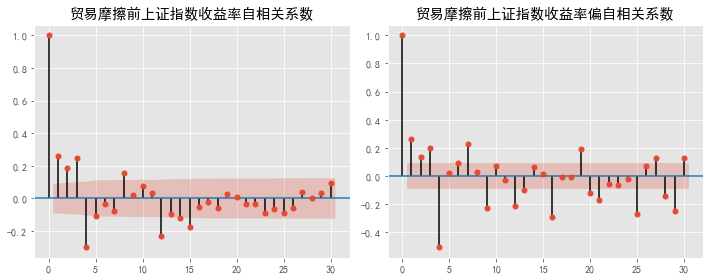

In [32]:
ts_plot(sd1_closed['closes1'],lags=30,title='贸易摩擦前上证指数收益率')

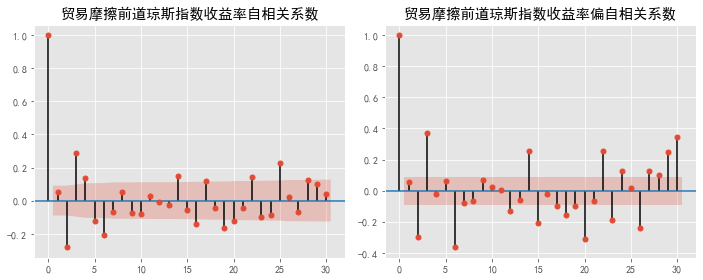

In [33]:
ts_plot(sd1_closed['closed1'],lags=30,title='贸易摩擦前道琼斯指数收益率')


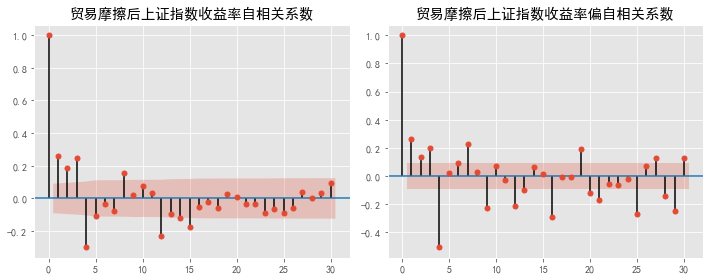

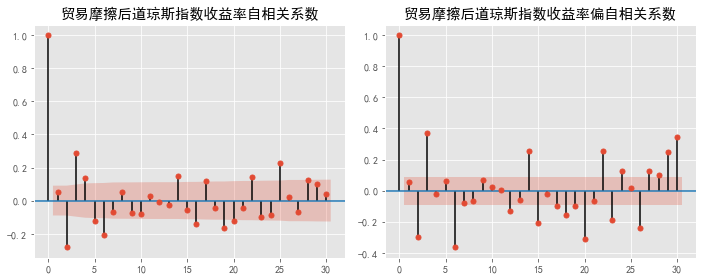

In [34]:
sd1_closed = pd.read_excel(io = 'D:\lunwen\\sd1_closed.xls')
ts_plot(sd1_closed['closes1'],lags=30,title='贸易摩擦后上证指数收益率')
ts_plot(sd1_closed['closed1'],lags=30,title='贸易摩擦后道琼斯指数收益率')


In [10]:
from arch.univariate import arch_model

In [11]:
import statsmodels.tsa.api as smt     
#tsa为Time Series analysis缩写
import statsmodels.api as sm
import scipy.stats as scs

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [15]:
def ret_plot(ts, title=''):
    ts1=ts**2
    ts2=np.abs(ts)
    with plt.style.context('ggplot'):    
        fig = plt.figure(figsize=(12, 6))
        layout = (2, 1)
        ts1_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        ts2_ax = plt.subplot2grid(layout, (1, 0))
        ts1.plot(ax=ts1_ax)
        ts1_ax.set_title(title+'日收益率平方')
        ts2.plot(ax=ts2_ax)
        ts2_ax.set_title(title+'日收益率绝对值')
        plt.tight_layout()
    return

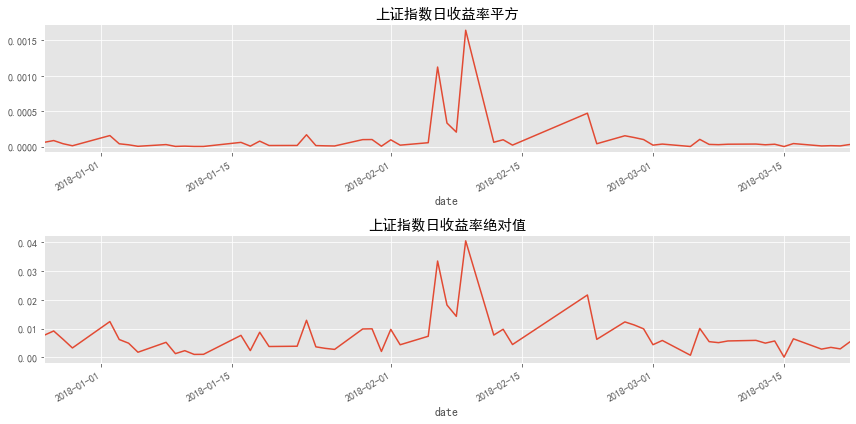

In [16]:
ret_plot(sd1_closed['closes1']/100, title='上证指数')

In [17]:
def whitenoise_test(ts):
    '''计算box pierce 和 box ljung统计量'''
    from statsmodels.stats.diagnostic import acorr_ljungbox
    q,p=acorr_ljungbox(ts)
    with plt.style.context('ggplot'):    
        fig = plt.figure(figsize=(10, 4))
        axes = fig.subplots(1,2)
        axes[0].plot(q, label='Q统计量')
        axes[0].set_ylabel('Q')
        axes[1].plot(p, label='p值')
        axes[1].set_ylabel('P')
        axes[0].legend()
        axes[1].legend()
        plt.tight_layout()
    return

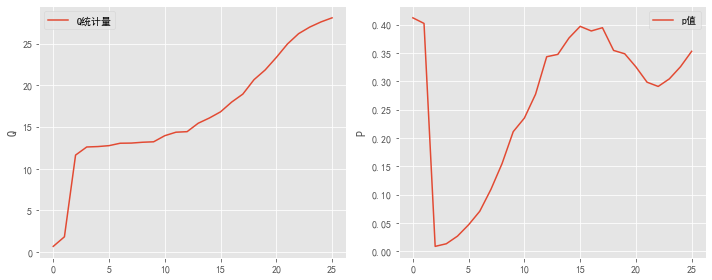

In [18]:
ret=sd1_closed['closes1']/100
whitenoise_test(ret**2)

In [19]:
sd2_closed = pd.read_excel(io = 'D:\lunwen\\sd2_closed.xls')

In [29]:
sd2_closed.columns = ['date','closes2','closed2']
sd2_closed['date'] = pd.to_datetime(sd2_closed['date'])
sd2_closed = sd2_closed.set_index('date')

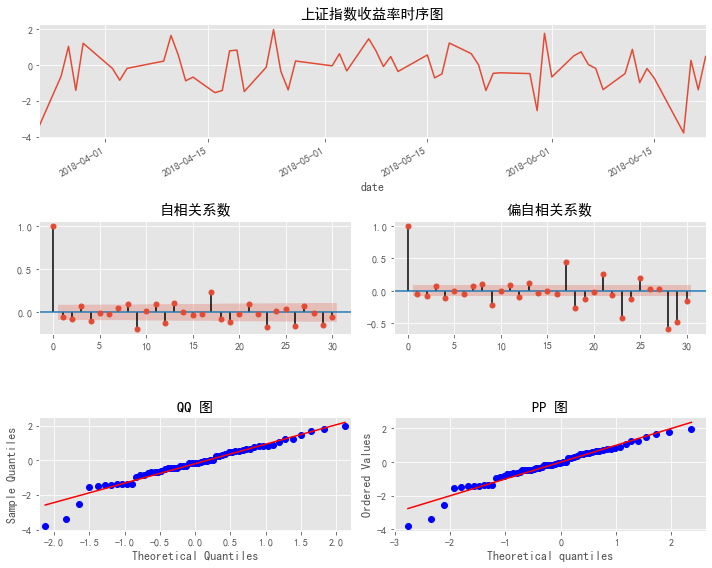

In [30]:
ts_plot(sd2_closed['closes2'],lags=30,title='上证指数收益率')


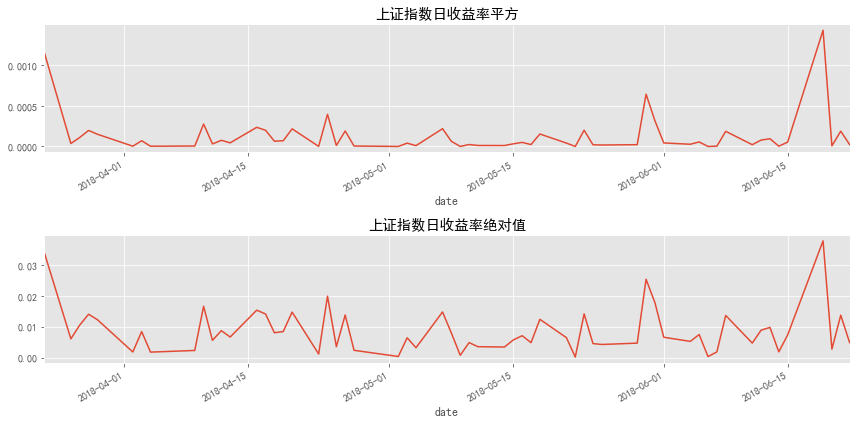

In [31]:
ret_plot(sd2_closed['closes2']/100, title='上证指数')

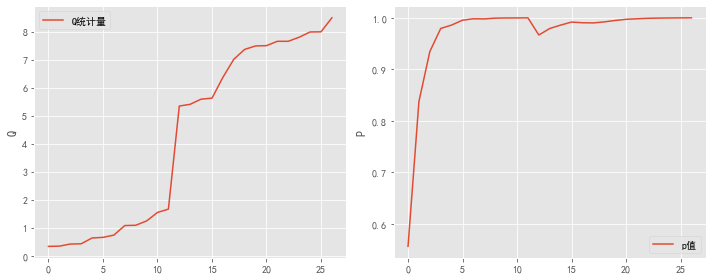

In [32]:
ret=sd2_closed['closes2']/100
whitenoise_test(ret**2)

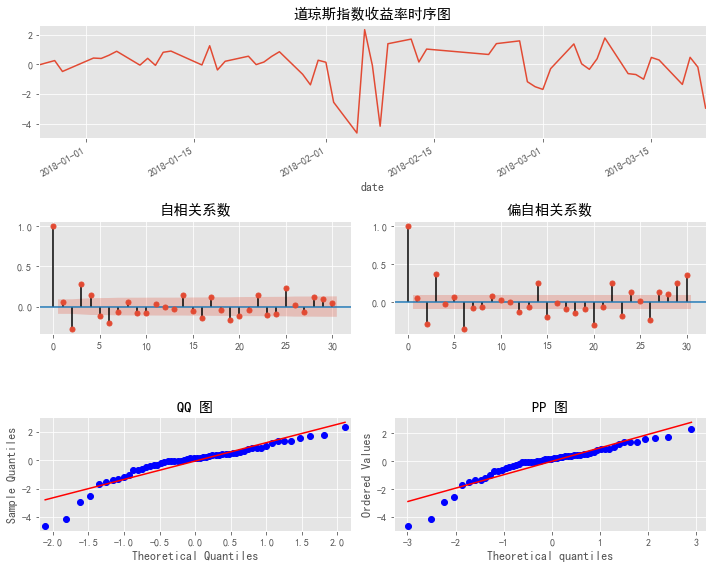

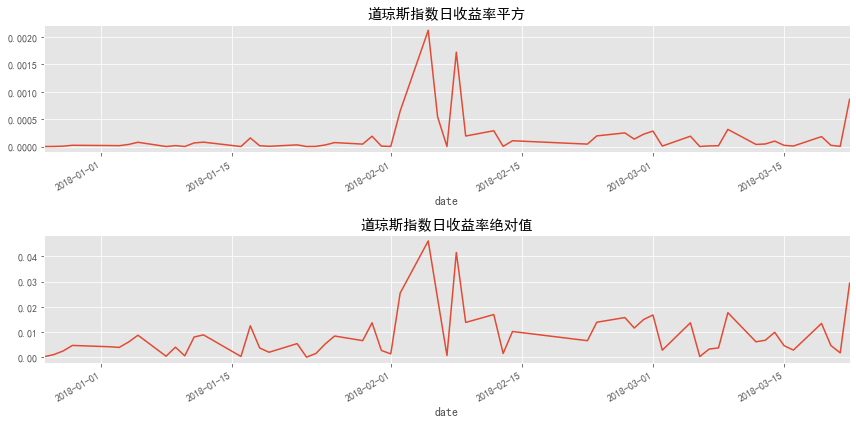

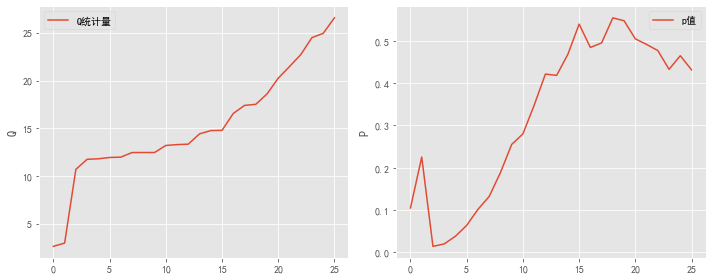

In [27]:
ts_plot(sd1_closed['closed1'],lags=30,title='道琼斯指数收益率')
ret_plot(sd1_closed['closed1']/100, title='道琼斯指数')
ret=sd1_closed['closed1']/100
whitenoise_test(ret**2)

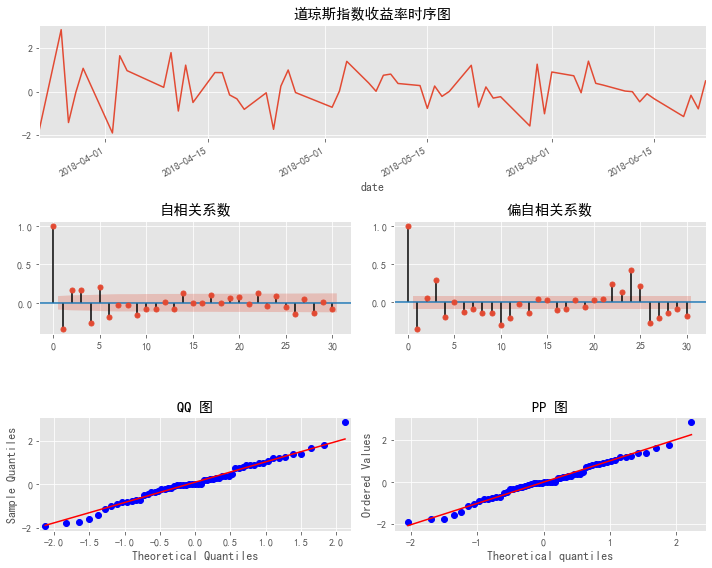

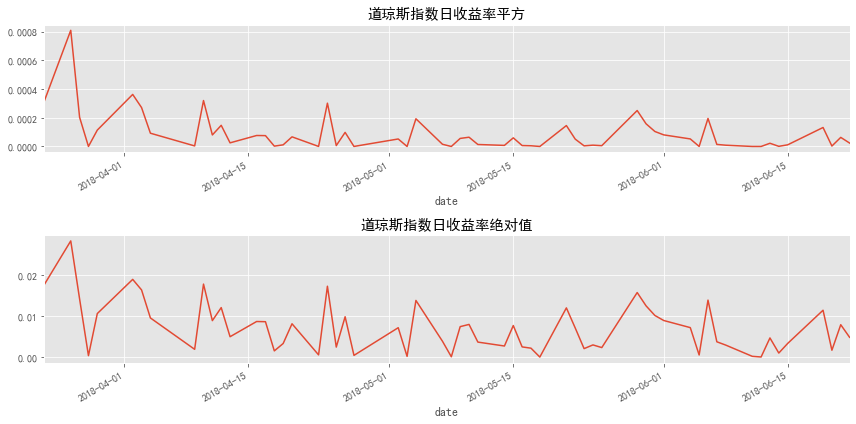

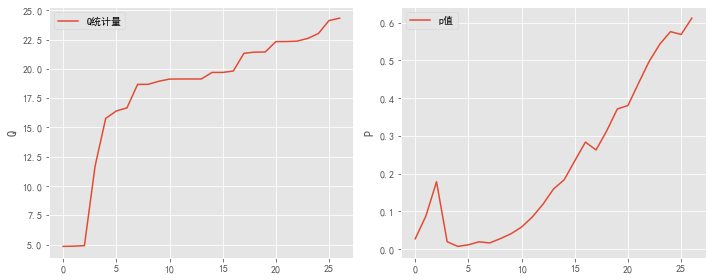

In [33]:
ts_plot(sd2_closed['closed2'],lags=30,title='道琼斯指数收益率')
ret_plot(sd2_closed['closed2']/100, title='道琼斯指数')
ret=sd2_closed['closed2']/100
whitenoise_test(ret**2)